<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_cd.png">

<center><h1 style="font-size:2em;color:#2467C0"> Datos del INEGI  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/inegi.png" align="middle" style="width:500"/></td>
<td>
    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.
    
</td>
</tr>
</table>

# API del Banco de Indicadores

La API de Indicadores del INEGI permite consultar los datos y metadatos de los indicadores disponibles a nivel nacional, por entidad federativa y municipio. Puede utilizar la API para crear aplicaciones que muestren la información directamente de las bases de datos del INEGI en el preciso momento en que se actualiza.
[[1]](https://www.inegi.org.mx/servicios/api_indicadores.html) 

<img src="figuras/Inegi_token.jpg" align="middle" style="width:1000px"/>


#  Historico de Población en México

<div class="alert alert-success">
1. Graficar el crecimiento de la población total, así como el de hombres y mujeres
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json                      

In [2]:
#Llamado al API
#     https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/[Aquí va tu Token]?type=json
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
respuesta = requests.get(url)
respuesta.status_code

200

In [3]:
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    #print(respuesta.content)
    contenido = json.loads(respuesta.content)
    #print(contenido)

contenido['Series'][0]['OBSERVATIONS'][0]['TIME_PERIOD']

'1910'

In [4]:
poblacion_total=[]
periodos=[]
poblacion_total = [int(element['OBS_VALUE'].split('.')[0]) for element in contenido['Series'][0]['OBSERVATIONS']]
periodos = [int(element['TIME_PERIOD']) for element in contenido['Series'][0]['OBSERVATIONS']]

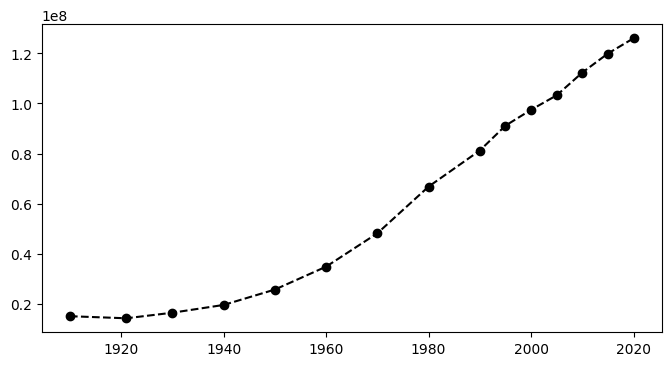

In [5]:
plt.figure(figsize=(8,4))
plt.plot( periodos , poblacion_total, 'ko--' )

In [8]:
#     https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/07000002/true/BISE/2.0/[Aquí va tu Token]?type=json
poblacion_estados = []
for estado in range(7000001,7000033):
  url= f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0{estado}/true/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'
  # url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/be24ce9d-c1fd-a823-14b5-cbd86b6418a1?type=json'
  respuesta = requests.get(url)
  if respuesta.status_code == 200:
      #print(respuesta.content)
      contenido = json.loads(respuesta.content)
      poblacion_estados.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
poblacion_estados = [int(float(poblacion)) for poblacion in poblacion_estados]
poblacion_estados

[1425607,
 3769020,
 798447,
 928363,
 3146771,
 731391,
 5543828,
 3741869,
 9209944,
 1832650,
 6166934,
 3540685,
 3082841,
 8348151,
 16992418,
 4748846,
 1971520,
 1235456,
 5784442,
 4132148,
 6583278,
 2368467,
 1857985,
 2822255,
 3026943,
 2944840,
 2402598,
 3527735,
 1342977,
 8062579,
 2320898,
 1622138]

In [13]:
df_estados = pd.read_csv('datos/Catalogo_entidades.csv').iloc[0:32,:]
df_estados;

In [14]:
df_estados['POBLACION'] =poblacion_estados
df_estados

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,POBLACION
0,1,AGUASCALIENTES,AS,1425607
1,2,BAJA CALIFORNIA,BC,3769020
2,3,BAJA CALIFORNIA SUR,BS,798447
3,4,CAMPECHE,CC,928363
4,5,COAHUILA DE ZARAGOZA,CL,3146771
5,6,COLIMA,CM,731391
6,7,CHIAPAS,CS,5543828
7,8,CHIHUAHUA,CH,3741869
8,9,CIUDAD DE MÉXICO,DF,9209944
9,10,DURANGO,DG,1832650


In [22]:
df_estados['POBLACION_M'] =(df_estados['POBLACION']/1000000).round(2)
df_estados

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,POBLACION,POBLACION_M
0,1,AGUASCALIENTES,AS,1425607,1.43
1,2,BAJA CALIFORNIA,BC,3769020,3.77
2,3,BAJA CALIFORNIA SUR,BS,798447,0.80
3,4,CAMPECHE,CC,928363,0.93
4,5,COAHUILA DE ZARAGOZA,CL,3146771,3.15
5,6,COLIMA,CM,731391,0.73
6,7,CHIAPAS,CS,5543828,5.54
7,8,CHIHUAHUA,CH,3741869,3.74
8,9,CIUDAD DE MÉXICO,DF,9209944,9.21
9,10,DURANGO,DG,1832650,1.83


In [15]:
estados_geo=('datos/mexico_estados_geo.json')

In [31]:
import folium 
mapa = folium.Map( location=[24,-102] , zoom_start = 4  )
titulo = 'Población en millones'
folium.Choropleth( geo_data =estados_geo , data=df_estados ,
                 columns=['ABREVIATURA','POBLACION_M'] , 
                 key_on='feature.id',
                 fill_color='Blues' , 
                 fill_opacity=0.75,
                 line_opacity=0.9,
                 legend_name=titulo).add_to(mapa)
mapa

<div class="alert alert-success">
2. Mostrar en un mapa  el porcentaje de población de 12 años y más económicamente activa por estados. 
Utilizar alguna gama de color que a continuación se presenta.

</div>

<img align="left" style="padding-right:10px;" src="figuras/colores.png">


In [ ]:
url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0'+municipio+'/true/BISE/2.0/[Aquí va tu Token]?type=json'

In [35]:
poblacion_municipios=[]
for municipio in range(1,107):
    municipio =70000310000 + municipio
    #print(municipio)

#poblacion_municipios=[]

In [80]:
df_municipios = pd.read_csv('datos/Catalogo_municipios.csv')
df_municipios.head(30)


,FID,fid.1,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,Cve_MunC,ID_Geo_N,Nom_Ent
0,a__31_MUN_INEGI_2020.1,1,31001,31,1,Abalá,31001,1,Yucatán
1,a__31_MUN_INEGI_2020.2,2,31002,31,2,Acanceh,31002,2,Yucatán
2,a__31_MUN_INEGI_2020.3,3,31003,31,3,Akil,31003,3,Yucatán
3,a__31_MUN_INEGI_2020.4,4,31004,31,4,Baca,31004,4,Yucatán
4,a__31_MUN_INEGI_2020.5,5,31005,31,5,Bokobá,31005,5,Yucatán
5,a__31_MUN_INEGI_2020.6,6,31006,31,6,Buctzotz,31006,6,Yucatán
6,a__31_MUN_INEGI_2020.7,7,31016,31,16,Chacsinkín,31016,7,Yucatán
7,a__31_MUN_INEGI_2020.8,8,31017,31,17,Chankom,31017,8,Yucatán
8,a__31_MUN_INEGI_2020.9,9,31018,31,18,Chapab,31018,9,Yucatán
9,a__31_MUN_INEGI_2020.10,10,31019,31,19,Chemax,31019,10,Yucatán


In [90]:
poblacion_municipios=[]
for municipio in df_municipios['CVE_MUN']:
    if municipio%10 == 0:
        print(municipio)
    municipio = str( 70000310000 + municipio )
    url='https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0'+municipio+'/true/BISE/2.0/4f7019f8-60f7-2212-a6ed-db6ca9251086?type=json'  
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
      #print(respuesta.content)
      contenido = json.loads(respuesta.content)
      poblacion_municipios.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
poblacion_municipios = [int(float(municipio)) for municipio in poblacion_municipios]
print(poblacion_municipios)


10
20
50
30
40
60
100
70
80
90
[6550, 16772, 12285, 6195, 2167, 9159, 3104, 4686, 3385, 38934, 7490, 3949, 4466, 2755, 8389, 3736, 16671, 1714, 5560, 4497, 9406, 4363, 4863, 3244, 3965, 995129, 6003, 3622, 8345, 2936, 6240, 4015, 2818, 16779, 21255, 6514, 6384, 8090, 5250, 35137, 4186, 28555, 141939, 5553, 7080, 33854, 7766, 25954, 3405, 66008, 7530, 2677, 3296, 5968, 23991, 3430, 37804, 13494, 2990, 976, 3974, 4962, 1701, 2118, 5631, 4220, 10053, 4049, 69147, 85460, 3451, 16350, 3206, 8967, 3971, 1949, 1857, 5854, 3774, 6921, 17939, 2683, 3747, 45062, 11020, 3355, 3512, 1915, 7037, 16680, 2133, 5464, 1917, 40495, 7503, 12700, 7888, 18420, 5444, 5690, 80672, 3684, 15346, 4191, 3293, 2215]


In [91]:
df_municipios['POBLACION'] = poblacion_municipios
df_municipios.head(2)

,FID,fid.1,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,Cve_MunC,ID_Geo_N,Nom_Ent,POBLACION
0,a__31_MUN_INEGI_2020.1,1,31001,31,1,Abalá,31001,1,Yucatán,6550
1,a__31_MUN_INEGI_2020.2,2,31002,31,2,Acanceh,31002,2,Yucatán,16772


In [92]:
municipios_geo=('datos/yucatan_municipios_geo.json')

In [94]:
mapa_yucatan = folium.Map( location=[20.50,-88.80] , zoom_start = 8  )
titulo = ''
folium.Choropleth( geo_data =municipios_geo , data=df_municipios ,
                 columns=['FID','POBLACION'] , 
                 key_on='feature.id',
                 fill_color='YlGnBu' , 
                 fill_opacity=0.75,
                 line_opacity=0.9,
                 legend_name=titulo).add_to(mapa_yucatan)
mapa_yucatan